In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [3]:
print(dataset.data[:10])
dataset.data.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


(150, 4)

In [4]:
print(dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(dataset.target, dataset.target_names)
dataset.target.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']


(150,)

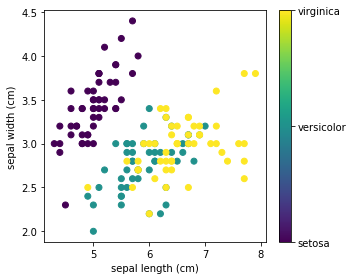

In [6]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dataset.data[:, x_index], dataset.data[:, y_index], c=dataset.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[x_index])
plt.ylabel(dataset.feature_names[y_index])

plt.tight_layout()
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_train1 = lda.fit_transform(x_train, y_train)
print (x_train1)

[[-1.64009067  2.97335761]
 [-7.08993146 -2.63529817]
 [-3.79857969  0.01263836]
 [-1.26697084  0.06965732]
 [-5.60860619  0.0194709 ]
 [-1.36682918  0.27959844]
 [-6.0489137   0.42342455]
 [ 7.39400766  0.88782928]
 [-6.08550787 -2.21090368]
 [-4.66702701 -1.16810234]
 [-5.4677419  -1.6325497 ]
 [ 7.60279387 -0.34287483]
 [-3.84347857 -0.92957034]
 [ 8.29579541  0.24821276]
 [-5.29906842 -0.14242993]
 [-1.70935552  3.04871713]
 [-1.73787185  0.60819256]
 [-6.77617883 -2.30686687]
 [ 9.10481501 -0.9794594 ]
 [-5.99816909 -1.21905741]
 [ 7.99191047  0.39573684]
 [ 8.16058736 -0.38948044]
 [-6.08116461 -1.32312478]
 [ 9.15689914 -0.84328033]
 [ 0.32839378  1.19740288]
 [-6.65824655 -1.44960219]
 [10.81817639 -1.96220983]
 [-0.95021788  1.78254353]
 [ 8.45926639  0.25619998]
 [-5.79379063 -0.36977975]
 [ 8.8260942  -0.56272629]
 [-6.85272738  0.85789221]
 [-0.58846757  2.15426852]
 [ 9.11091414 -0.49391952]
 [ 8.82066483 -0.15893566]
 [-5.81228092  0.74391449]
 [-7.38481198 -0.60974642]
 

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(x_train1, y_train)

x_test = lda.transform(x_test)

y_pred = classifier.predict(x_test)

In [10]:
#y_pred = lda.predict (x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[11  4  0]
 [ 0 16  2]
 [ 0  0 12]]
Accuracy0.8666666666666667


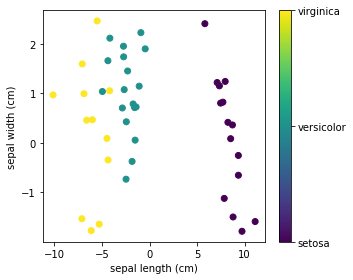

In [11]:
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(x_test[:, 0], x_test[:, 1],c = y_test)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.tight_layout()
plt.show()

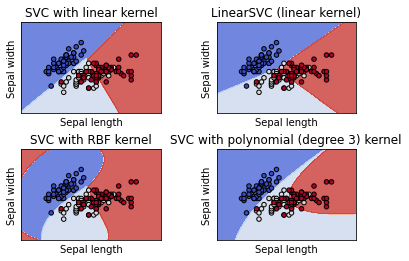

In [12]:
import sklearn.datasets as datasets
from sklearn import svm
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [13]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import tensorboard
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
from sklearn.model_selection import KFold

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 5),
            nn.Sigmoid(),
            nn.Linear(5, 2),
        )
 
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
class CircleDataset(Dataset):
    def __init__(self, size, radius, transform=None, target_transform=None):
        self.size = size
        self.radius = radius
        self.labels = np.arange (size)
        self.points = np.random.uniform(-radius, radius, [size, 2])
        self.transform = transform
        self.target_transform = target_transform
        for i in range (size):
            radius_in = np.sqrt(self.points[i][0] * self.points[i][0] + self.points[i][1] * self.points[i][1])
            if (radius_in <= radius):
                self.labels [i] = 1
            else:
                self.labels [i] = 0   
    def __len__(self):
        return (self.labels.shape[-1])
    def __getitem__(self, idx):
        if (self.transform):
            x = self.transform (self.points[idx].reshape (2, 1))
        #if (self.target_transform):
        #    self.labels[idx] = self.target_transform (self.labels[idx])
        return x, self.labels[idx]
    

C:\Users\user\anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


Using cuda device


In [14]:
model = NeuralNetwork()
print(model)
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 
writer = SummaryWriter() 
writer = SummaryWriter("logs/data")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=2, bias=True)
  )
)


In [15]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X.float())
        loss = loss_fn(pred, y.long())
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax (1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (correct * 100, test_loss)

In [16]:
training_data = CircleDataset(
    size = 2500,
    radius = 0.75,
    transform=ToTensor()
)

test_data = CircleDataset(
    size = 1000,
    radius = 0.75,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

In [17]:
model = model.float()
epochs = 30
points = []
accuracy = []
loss = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    acc,lo = test(test_dataloader, model, loss_fn)
    accuracy.append (acc)
    points.append (t)
    loss.append (lo)
for i in range (epochs):
    writer.add_scalars('accuracy_curve', {'accuracy':accuracy[i],
                                 }, i)
    writer.add_scalars('loss_curve', {'loss':loss[i],
                                 }, i) 

Epoch 1
-------------------------------
loss: 0.804159  [    0/ 2500]
loss: 0.758226  [ 1000/ 2500]
loss: 0.613663  [ 2000/ 2500]
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.535538 

Epoch 2
-------------------------------
loss: 0.229161  [    0/ 2500]
loss: 0.361250  [ 1000/ 2500]
loss: 0.499913  [ 2000/ 2500]
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.532669 

Epoch 3
-------------------------------
loss: 0.504056  [    0/ 2500]
loss: 0.181357  [ 1000/ 2500]
loss: 0.361255  [ 2000/ 2500]
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.522429 

Epoch 4
-------------------------------
loss: 0.467588  [    0/ 2500]
loss: 0.377666  [ 1000/ 2500]
loss: 0.370180  [ 2000/ 2500]
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.495639 

Epoch 5
-------------------------------
loss: 0.453866  [    0/ 2500]
loss: 0.550296  [ 1000/ 2500]
loss: 0.419811  [ 2000/ 2500]
Test Error: 
 Accuracy: 77.4%, Avg loss: 0.459075 

Epoch 6
-------------------------------
loss: 0.446915  [    0/ 2500]
loss: 0.490403  [ 10

## Task 1. Find the accuracy and confusion matrix for RBF SVM classifier on iris dataset. 

In [18]:
import sklearn.datasets as datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

In [19]:
#Task 1
X = iris.data[:, :]
y = iris.target
C = 1.0
print ('Iris dataset shape:', X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score for RBF SVM classifier:', accuracy_score(y_test, y_pred))
print('Confusion matrix for RBF SVM classifier:\n',cm)

Iris dataset shape: (150, 4)
Accuracy score for RBF SVM classifier: 0.9777777777777777
Confusion matrix for RBF SVM classifier:
 [[14  0  0]
 [ 0 12  0]
 [ 0  1 18]]


## Task 2. Show the classification accuracy and confusion matrix using only 'sepal length' and 'sepal width' features for the LDA classifier 


In [20]:
#Task 2
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
print('All feature names:',iris.feature_names)

X = iris.data[:, :2]
y = iris.target
C = 1.0
print ('Selected Iris dataset shape:', X.shape)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# create the lda model
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)

# Predict class labels for samples in x_test.
y_pred = lda.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print('Accuracy score for the LDA classifier:', accuracy_score(y_test, y_pred))
print('Confusion matrix for the LDA classifier:\n', cm)

All feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Selected Iris dataset shape: (150, 2)
Accuracy score for the LDA classifier: 0.8222222222222222
Confusion matrix for the LDA classifier:
 [[12  0  0]
 [ 0 12  3]
 [ 0  5 13]]


## Task 3. Train the neural network for the identification of points within a circle using radius value of 1


In [21]:
#Task 3
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


# Generate Train and Test datasets
class CircleDataset(Dataset):
    def __init__(self, size, radius, transform=None, target_transform=None):
        self.size = size
        self.radius = radius
        self.labels = np.arange (size)
        self.points = np.random.uniform(-radius, radius, [size, 2])
        self.transform = transform
        self.target_transform = target_transform
        for i in range (size):
            radius_in = np.sqrt(self.points[i][0] * self.points[i][0] + self.points[i][1] * self.points[i][1])
            if (radius_in <= radius):
                self.labels [i] = 1
            else:
                self.labels [i] = 0
    def __len__(self):
        return (self.labels.shape[-1])
    def __getitem__(self, idx):
        if (self.transform):
            x = self.transform (self.points[idx].reshape (2, 1))
        #if (self.target_transform):
        #    self.labels[idx] = self.target_transform (self.labels[idx])
        return x, self.labels[idx]
    def shape(self):
        return (self.points.shape, self.labels.shape,)

training_data = CircleDataset(
    size = 7000,
    radius = 1,
    transform=ToTensor()
)

test_data = CircleDataset(
    size = 3000,
    radius = 1,
    transform=ToTensor()
)

print('Train dataset:', training_data.shape())
# print(training_data.points)
# print(training_data.labels)

print('Test dataset:', test_data.shape())
# print(test_data.points)
# print(test_data.labels)

train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)

Train dataset: ((7000, 2), (7000,))
Test dataset: ((3000, 2), (3000,))


In [22]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 5),
            nn.Sigmoid(),
            nn.Linear(5, 2),
        )
 
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [23]:
from torch.utils.tensorboard import SummaryWriter
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

model = NeuralNetwork()
print(model)
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

writer = SummaryWriter(log_dir = "logs/data", filename_suffix = '.weekly_assignment_02')

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=2, bias=True)
  )
)


In [24]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X.float())
        loss = loss_fn(pred, y.long())
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax (1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (correct * 100, test_loss)

In [25]:
model = model.float()
epochs = 30
points = []
accuracy = []
loss = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    acc, lo = test(test_dataloader, model, loss_fn)
    accuracy.append (acc)
    points.append (t)
    loss.append (lo)

for i in range (epochs):
    writer.add_scalars('accuracy_curve', {'accuracy':accuracy[i]}, i)
    writer.add_scalars('loss_curve', {'loss':loss[i]}, i) 

Epoch 1
-------------------------------
loss: 0.697547  [    0/ 7000]
loss: 0.809321  [ 1000/ 7000]
loss: 0.633347  [ 2000/ 7000]
loss: 0.819884  [ 3000/ 7000]
loss: 0.500354  [ 4000/ 7000]
loss: 0.365332  [ 5000/ 7000]
loss: 0.264842  [ 6000/ 7000]
Test Error: 
 Accuracy: 79.1%, Avg loss: 0.498658 

Epoch 2
-------------------------------
loss: 0.459993  [    0/ 7000]
loss: 0.482878  [ 1000/ 7000]
loss: 0.201101  [ 2000/ 7000]
loss: 0.271697  [ 3000/ 7000]
loss: 0.375257  [ 4000/ 7000]
loss: 0.776011  [ 5000/ 7000]
loss: 0.521552  [ 6000/ 7000]
Test Error: 
 Accuracy: 80.3%, Avg loss: 0.412205 

Epoch 3
-------------------------------
loss: 0.274126  [    0/ 7000]
loss: 0.450655  [ 1000/ 7000]
loss: 0.401448  [ 2000/ 7000]
loss: 0.467640  [ 3000/ 7000]
loss: 0.406361  [ 4000/ 7000]
loss: 0.309061  [ 5000/ 7000]
loss: 0.229465  [ 6000/ 7000]
Test Error: 
 Accuracy: 80.5%, Avg loss: 0.394065 

Epoch 4
-------------------------------
loss: 0.315905  [    0/ 7000]
loss: 0.193029  [ 1000/ 

loss: 0.051602  [ 2000/ 7000]
loss: 0.071255  [ 3000/ 7000]
loss: 0.141975  [ 4000/ 7000]
loss: 0.053233  [ 5000/ 7000]
loss: 0.019110  [ 6000/ 7000]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.092531 

Epoch 29
-------------------------------
loss: 0.007297  [    0/ 7000]
loss: 0.132527  [ 1000/ 7000]
loss: 0.046482  [ 2000/ 7000]
loss: 0.130005  [ 3000/ 7000]
loss: 0.036761  [ 4000/ 7000]
loss: 0.053932  [ 5000/ 7000]
loss: 0.032082  [ 6000/ 7000]
Test Error: 
 Accuracy: 97.2%, Avg loss: 0.091944 

Epoch 30
-------------------------------
loss: 0.034832  [    0/ 7000]
loss: 0.030289  [ 1000/ 7000]
loss: 0.003843  [ 2000/ 7000]
loss: 0.007401  [ 3000/ 7000]
loss: 0.024690  [ 4000/ 7000]
loss: 0.080438  [ 5000/ 7000]
loss: 0.073871  [ 6000/ 7000]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.094026 



Task 4. Plot the circle and distribution of points of sample size of 3000 around the origin at distance of 1. Points that was classified "within a circle" should be colored green and points that was classified as "outside a circle" should be colored red. 
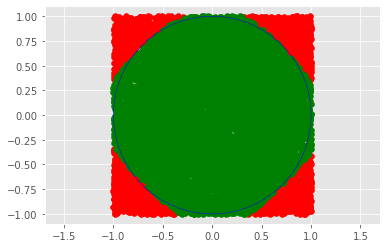

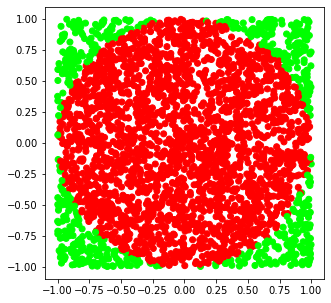

In [26]:
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# print(test_data.points, test_data.labels)
color = np.array(['#0f0', '#f00'])

plt.figure(figsize=(5, 5))
plt.scatter(test_data.points[:, x_index], test_data.points[:, y_index], c=color[test_data.labels])
plt.show()